# Image classification

## Data Collection

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-10 06:31:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   181MB/s    in 0.4s    

2020-07-10 06:31:54 (181 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Main Folder

*   Train -- cats and dogs

*   validation -- cats and dogs




In [ ]:
import os
import zipfile
local_zip = "/tmp/cats_and_dogs_filtered.zip" ## which zip file you want to extarct
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp') ## In which location you want to store extracted files
zip_ref.close()

In [ ]:
os.listdir("/tmp/cats_and_dogs_filtered")

['train', 'vectorize.py', 'validation']

In [ ]:
os.listdir('/tmp/cats_and_dogs_filtered/train')

['dogs', 'cats']

In [ ]:
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/cats')))
print(len(os.listdir('/tmp/cats_and_dogs_filtered/train/dogs')))

1000
1000


In [ ]:
base_dir = "/tmp/cats_and_dogs_filtered"
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
## Directory with training cat pictures
train_cat_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')
validation_cat_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')


In [ ]:
## File names
train_cat_filenames = os.listdir(train_cat_dir )
train_cat_filenames[:4]

['cat.955.jpg', 'cat.776.jpg', 'cat.914.jpg', 'cat.467.jpg']

In [ ]:
os.listdir()

['.config', 'sample_data']

## Display sample Images 

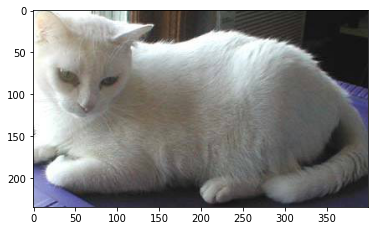

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_cat_dir+'/cat.955.jpg'))

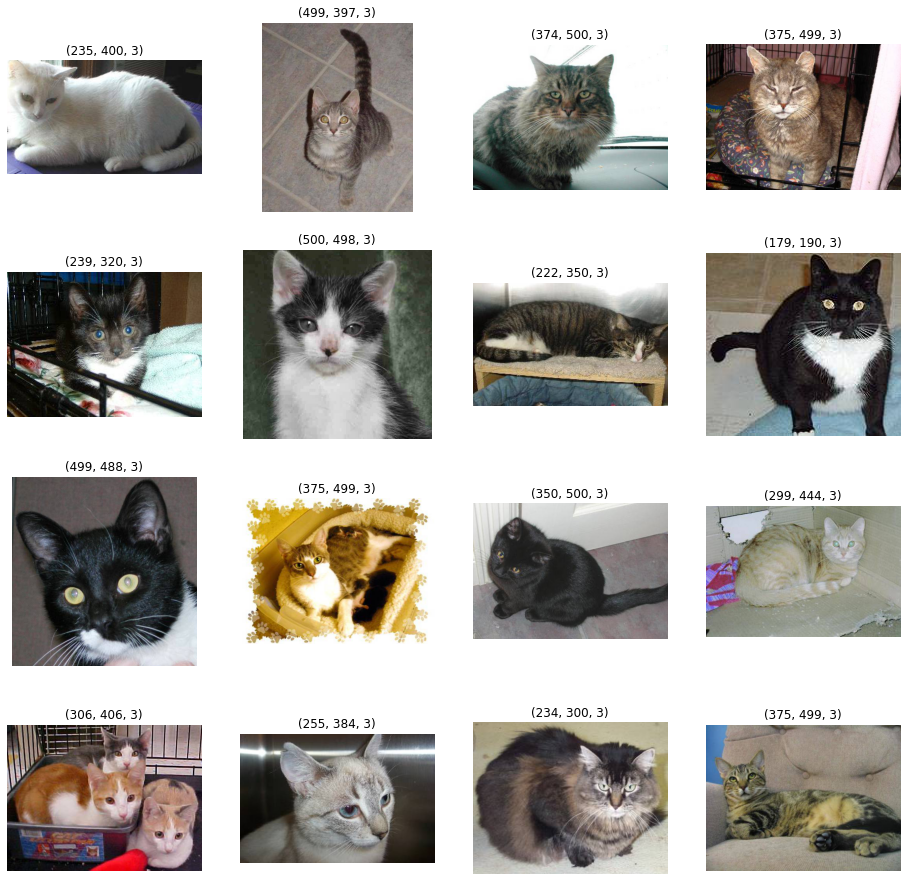

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
j = 1  ## plot position
for i in range(16):
  img = plt.imread(os.path.join(train_cat_dir,train_cat_filenames[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j += 1


## Data Preprocessing 
Read the image data<br>
We have different shapes here.<br>
We need same shape for each image<br>
reshaing the images<br>
cats and dogs labelling<br>


## Creating Train and valiadtion data from Folder

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_generator

(20, 150, 150, 3)
(20,)


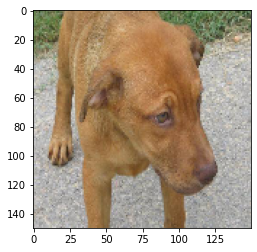

In [ ]:
imgs,labels = train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])